# 1. Unconstrained optimization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def oracle1(x, mode):
    if mode==1:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1]
    if mode==2:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1], np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])
    if mode==3:
        return np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])
    
    

In [5]:
x=[2,1]
oracle1(x,2)


(1, array([ 2, -2]))

In [6]:
def oracle2(x, mode):
    if mode==1:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
    if mode==2:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
    if mode==3:
        return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])

In [7]:
x=[2,1]
oracle2(x,2)

(91, array([242, -60]))

In [8]:
def oracle3(x, mode):
    if mode==1:
        return 1/2 * np.dot(x,x)
    if mode==2:
        return 1/2 * np.dot(x,x) , np.array(x)
    if mode==3:
        return np.array(x)

In [9]:
x=np.array([2,1])
oracle3(x,2)


(2.5, array([2, 1]))

In [293]:
def norme(x):
    return np.sqrt(np.dot(x,x))

In [36]:
def methode_gradient(oracle, x0, k=0, MaxIt=1000, t=0.5, tol=10e-6):
    x=x0
    list=[x0]
    f=oracle(x, 2)
    while (norme(f[1]) > tol) and (k < MaxIt):
        x= x - t*f[1]
        list.append(x)
        k= k + 1
        f=oracle(x, 2)
    print(x, f, k)
    x = [list[i][0] for i in range(len(list))]
    y = [list[i][1] for i in range(len(list))]   
    plt.plot(x,y,'ob')
    plt.show()

[0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] (3.240074875066057e-11, array([0.00000000e+00, 4.76837158e-07, 9.53674316e-07, 1.43051147e-06,
       1.90734863e-06, 2.38418579e-06, 2.86102295e-06, 3.33786011e-06,
       3.81469727e-06, 4.29153442e-06])) 21


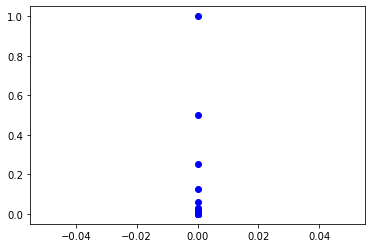

In [37]:
x0=[i for i in range(10)]
#x0=[2,3]
methode_gradient(oracle3, x0)

[5.99998578 6.00001422] (8.082849944912596e-10, array([-5.68605761e-05,  5.68605761e-05])) 25


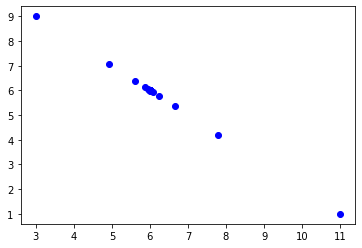

In [260]:
x0=np.array([11,1])
oracle = oracle1
list = methode_gradient(oracle, x0, MaxIt=25, t=0.4)

[12.49990758 12.50009242] (3.416300842218334e-08, array([-0.00036966,  0.00036966])) 250


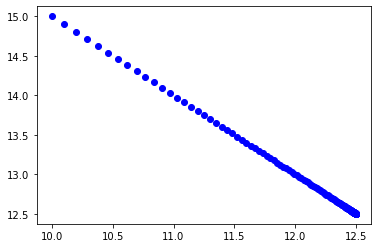

In [38]:
x0=np.array([10,15])
oracle = oracle1
methode_gradient(oracle, x0, MaxIt=250, t=0.01)


<ipython-input-10-48920662aeb3>:2: RuntimeWarning: overflow encountered in double_scalars
  return (sum(x[i]**2 for i in range(len(x))))**(1/2)
<ipython-input-6-e65dea4d4a78>:5: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
<ipython-input-6-e65dea4d4a78>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])


[inf inf] (nan, array([nan, nan])) 6


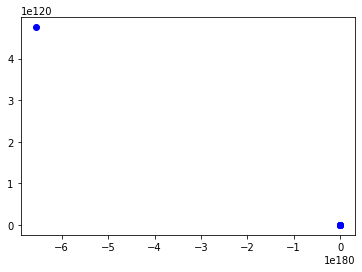

In [15]:
x0=np.array([2,3])
oracle = oracle2
methode_gradient(oracle, x0)

[3.81469727e-06 5.72204590e-06] (2.3646862246096134e-11, array([3.81469727e-06, 5.72204590e-06])) 19


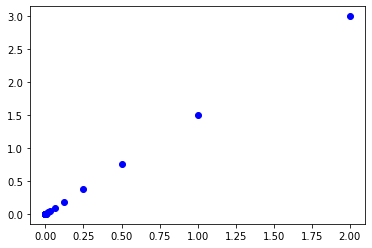

In [16]:
x0=np.array([2,3])
oracle = oracle3
methode_gradient(oracle, x0)

[0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] (3.240074875066057e-11, array([0.00000000e+00, 4.76837158e-07, 9.53674316e-07, 1.43051147e-06,
       1.90734863e-06, 2.38418579e-06, 2.86102295e-06, 3.33786011e-06,
       3.81469727e-06, 4.29153442e-06])) 21


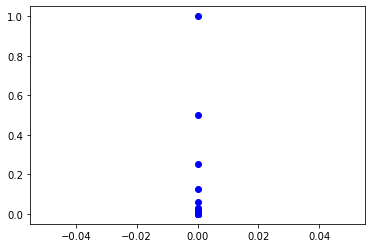

In [17]:
x0=[i for i in range(10)]
oracle = oracle3
methode_gradient(oracle, x0)

[2.49999827 2.50000173] (1.1997514093309292e-11, array([-6.92739213e-06,  6.92739213e-06])) 308


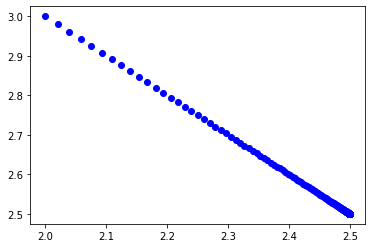

In [39]:
x0=[2,3]
methode_gradient(oracle1, x0, MaxIt=1000 , t=0.01)

<ipython-input-10-48920662aeb3>:2: RuntimeWarning: overflow encountered in double_scalars
  return (sum(x[i]**2 for i in range(len(x))))**(1/2)
<ipython-input-6-e65dea4d4a78>:5: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
<ipython-input-6-e65dea4d4a78>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])


[inf inf] (nan, array([nan, nan])) 6


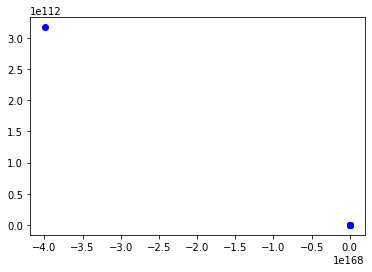

In [40]:
x0=[2,3]
methode_gradient(oracle2, x0, MaxIt = 10 , t = 0.4)

[8.63424948e-05 1.29513742e-04] (1.2114417919449722e-08, array([8.63424948e-05, 1.29513742e-04])) 1000


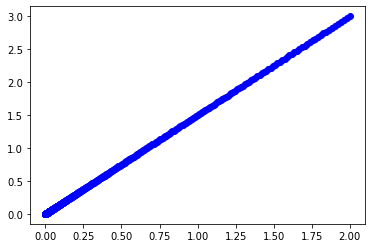

In [41]:
x0=np.array([2,3])
methode_gradient(oracle3, x0, MaxIt = 1000 , t=0.01)

[0.00000000e+00 4.31712474e-05 8.63424948e-05 1.29513742e-04
 1.72684990e-04 2.15856237e-04 2.59027484e-04 3.02198732e-04
 3.45369979e-04 3.88541227e-04] (2.6558531592639854e-07, array([0.00000000e+00, 4.31712474e-05, 8.63424948e-05, 1.29513742e-04,
       1.72684990e-04, 2.15856237e-04, 2.59027484e-04, 3.02198732e-04,
       3.45369979e-04, 3.88541227e-04])) 1000


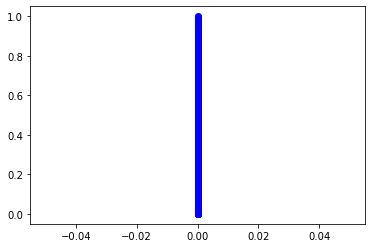

In [21]:
x0=[i for i in range(10)]
methode_gradient(oracle3, x0, MaxIt=1000 , t=0.01)

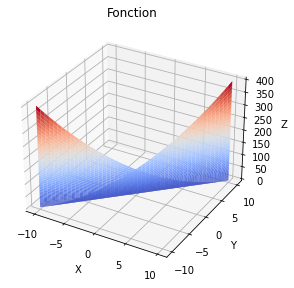

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Tableau pour les 3 axes
inf = -10
sup = 10
N = 50

A = np.zeros((N,N))
Intervalle = np.linspace(inf,sup,N)

for i,x1 in enumerate(Intervalle):
    for j, x2 in enumerate(Intervalle):
        x0=np.array([x1,x2])
        A[i,j] = oracle1(x0,1)


# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(X=Intervalle, Y=Intervalle, Z=A, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface
plt.title("Fonction")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

plt.show()

In [33]:
def methode_gradient2(oracle, x0, k=0, MaxIt=1000, t=0.5, tol=10e-6):
    x=x0
    list=[x0]
    f=oracle(x, 2)
    z=[f[0]]
    while (norme(f[1]) > tol) and (k < MaxIt):
        x= x - t*f[1]
        list.append(x)
        z.append(f[0])
        k= k + 1
        f=oracle(x, 2)
    print(x, f, k)
    x = [list[i][0] for i in range(len(list))]
    y = [list[i][1] for i in range(len(list))]   
    

    inf = -10
    sup = 10
    N = 50

    A = np.zeros((N,N))
    Intervalle = np.linspace(inf,sup,N)

    for i,x1 in enumerate(Intervalle):
        for j, x2 in enumerate(Intervalle):
            x0=np.array([x1,x2])
            A[i,j] = oracle(x0,1)


    # Tracé du résultat en 3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.plot_surface(X=Intervalle, Y=Intervalle, Z=A, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface
    ax.scatter(x, y, z, label='Courbe', marker='d')  # Tracé des points 3D
    plt.title("Fonction")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

In [321]:
def Armijo(x, fdex, gradient, t, oracle):
    m1=0.001
    theta=0.8
    p=0
    f1 = oracle(x - t*gradient,1)
    f2 = fdex + m1 * t * np.dot(gradient,(-1)*gradient)
    while f1 >= f2 and p<50:
        t = theta * t
        p = p + 1
    #print(t,p,f1,f2)
    return t



In [313]:
def methode_gradient_armijo(oracle, x0, MaxIt=10, t=0.4, tol=10e-6):
    x=x0
    list=[x0]
    f,g=oracle(x, 2)
    k=0
    while (norme(g) > tol) and (k < MaxIt):
        t = Armijo(x, f, g, t, oracle)
        x = x - t * g
        list.append(x)
        k = k + 1
        f,g=oracle(x, 2)
        
    print(x, f, g, k)

In [235]:
x=[1,0]
f,g=oracle1(x,2)
oracle1(x - 0.4*g,1)

0.3600000000000002

In [327]:
x0=np.array([1,0])
methode_gradient_armijo(oracle1, x0, MaxIt=30, t=0.4)

[0.49999858 0.50000142] 8.08286770848099e-12 [-5.68605761e-06  5.68605761e-06] 25


In [333]:
x0=np.array([15,7])
methode_gradient_armijo(oracle2, x0, MaxIt=1100, t=0.4)

[15  7] 475436 [130828  -4360] 0


<ipython-input-293-48349875aa2f>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(x,x))


In [257]:
x0=np.array([2,3])
methode_gradient_armijo(oracle3, x0, MaxIt= 100)

[3.41163456e-06 5.11745185e-06] 1.8913781892675437e-11 [3.41163456e-06 5.11745185e-06] 26 [array([2, 3]), array([1.2, 1.8]), array([0.72, 1.08]), array([0.432, 0.648]), array([0.2592, 0.3888]), array([0.15552, 0.23328]), array([0.093312, 0.139968]), array([0.0559872, 0.0839808]), array([0.03359232, 0.05038848]), array([0.02015539, 0.03023309])]


In [180]:
def oracle4(x, mode):
    if mode==1:
        return sum(np.arange(1,len(x)+1) * x**2 +10 * x**4)
    if mode==2:
        return sum(np.arange(1,len(x)+1) * x**2 +10 * x**4), np.arange(1,len(x)+1)* x * 2 + 40 * x**3
    if mode==3:
        return np.arange(1,len(x)+1)* x * 2 + 40 * x**3

In [329]:
x=np.array([10,10,-10])
oracle4(x,2)

(300600, array([ 40020,  40040, -40060]))

In [336]:
methode_gradient_armijo(oracle4, x, MaxIt=3000, t=0.5)

[ 9.99999995  9.99999995 -9.99999995] 300599.9935923182 [ 40019.99936009  40039.99935966 -40059.99935923] 3000
